# Análise de Diversidade
Neste notebook estamos extraindo informações de diversidade de gênero em texto de anúncios de vagas de emprego.

https://www.kaggle.com/competitions/data-science-for-good-city-of-los-angeles

### Upload CSV
Acesse o link abaixo para fazer o download do CSV base:

https://www.kaggle.com/code/shahules/discovering-opportunities-at-la/output?select=job+class+output.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving job_class_output.csv to job_class_output (1).csv


In [ ]:
import io
import pandas as pd
jobs_df = pd.read_csv(io.BytesIO(uploaded['job_class_output.csv']))
jobs_df

,Unnamed: 0,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,selection,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE
0,0,WATER SERVICE REPRESENTATIVE 1693 111717.txt,water service representative,"70,177","$87,194",2017-11-17,Three years of full-time paid experience in a ...,A Water Service Representative makes field inv...,"NOVEMBER 30, 2017",['Test'],Three,FULL_TIME,NaN,NaN
1,1,HARBOR PLANNING AND ECONOMIC ANALYST 9224 1118...,harbor planning and economic analyst,"70,908","$103,648",2016-11-18,1. Graduation from an accredited four-year col...,A Harbor Planning and Economic Analyst perform...,"DECEMBER 8, 2016",['Questionnaire'],Two,FULL_TIME,four,College or University
2,2,MANAGING WATER UTILITY ENGINEER 9406 032417 RE...,managing water utility engineer,"148,561","$184,579",2017-03-24,1. Two years of full-time paid experience at t...,A Managing Water Utility Engineer may serve as...,"APRIL 13, 2017","['Essay', 'Interview']",Two,FULL_TIME,NaN,NaN
3,3,VETERINARY TECHNICIAN 2369 020599 REV 120417.txt,veterinary technician,"50,425","$73,706",1999-02-05,A Registered Veterinary Technician (RVT) certi...,A Veterinary Technician assists a Veterinarian...,NaN,['Review'],NaN,NaN,NaN,NaN
4,4,SENIOR UTILITY SERVICES SPECIALIST 3573 113018...,senior utility services specialist,"117,199","$145,596",2018-11-30,Two years of full-time paid experience with th...,"A Senior Utility Services Specialist assigns, ...","DECEMBER 13, 2018","['Essay', 'Interview']",Two,FULL_TIME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,655,PLUMBER SUPERVISOR 3446 100518.txt,plumber supervisor,"108,482",NaN,2018-10-05,1. Four years of full-time paid experience as ...,"A Plumber Supervisor assigns, reviews and eval...","OCTOBER 18, 2018",['Interview'],Four,FULL_TIME,NaN,NaN
656,656,PRINCIPAL ACCOUNTANT 1525 121517.txt,principal accountant,"77,840","$113,816",2017-12-15,Two years of full-time paid accounting or audi...,A Principal Accountant directs or assists in d...,"DECEMBER 28, 2017","['Essay', 'Interview']",Two,FULL_TIME,NaN,NaN
657,657,HELICOPTER MECHANIC 3742 072206 REV 020818.txt,helicopter mechanic,"96,074",NaN,2005-07-22,"Three years of full-time paid experience, two ...","A Helicopter Mechanic inspects, repairs, overh...",NaN,[],Three,FULL_TIME,NaN,NaN
658,658,PRINCIPAL ENVIRONMENTAL ENGINEER 7875 092118.txt,principal environmental engineer,"123,066","$179,943",2018-09-21,1. Registration as a Professional Engineer wit...,A Principal Environmental Engineer serves as t...,"OCTOBER 4, 2018","['Essay', 'Interview']",Two,FULL_TIME,NaN,NaN


In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
every_job_text = {
    "requirements": "",
    "duties": ""
}

In [ ]:
for index in range(len(jobs_df)):
  requirements = jobs_df.iloc[index]['requirements']
  duties = jobs_df.iloc[index]['duties']
  every_job_text['requirements'] += requirements
  every_job_text['duties'] += duties


# Tokens
Nesta seção estamos tokenizando os textos, assim como removendo sinal de pontuação e stopwords.

In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
requirements_tokens = tokenizer.tokenize(every_job_text['requirements'])
duties_tokens = tokenizer.tokenize(every_job_text['duties'])

In [ ]:
from nltk.corpus import stopwords

stopword_list = stopwords.words('english')

requirements_tokens_without_stopwords = [word.lower() for word in requirements_tokens if word.lower() not in stopword_list]
duties_tokens_without_stopwords = [word.lower() for word in duties_tokens if word.lower() not in stopword_list]

# Stem
Aqui, estamos fazendo o stem das palavras e exibindo as ocorências mais frequentes para análise.

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

requirements_stemmed = [stemmer.stem(word) for word in requirements_tokens_without_stopwords]
duties_stemmed = [stemmer.stem(word) for word in duties_tokens_without_stopwords]

In [ ]:
from nltk.probability import FreqDist

requirements_freq = FreqDist(requirements_stemmed)
duties_freq = FreqDist(duties_stemmed)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Texto dos Requerimentos
Numvem de palavras das descrições de texto dos requerimentos das vagas

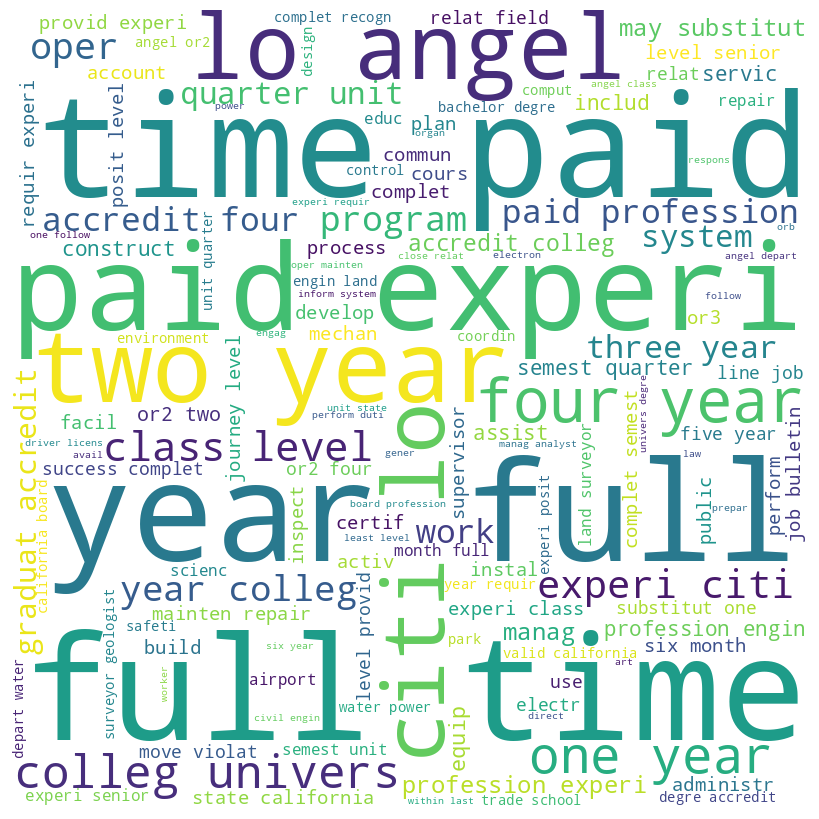

In [ ]:
requirements_clean_words_string = " ".join(requirements_stemmed)

wordcloud = WordCloud(
                width = 800,
                height = 800,
                background_color ='white',
                min_font_size = 10).generate(requirements_clean_words_string)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Texto dos Deveres
Numvem de palavras das descrições de texto dos deveres das vagas

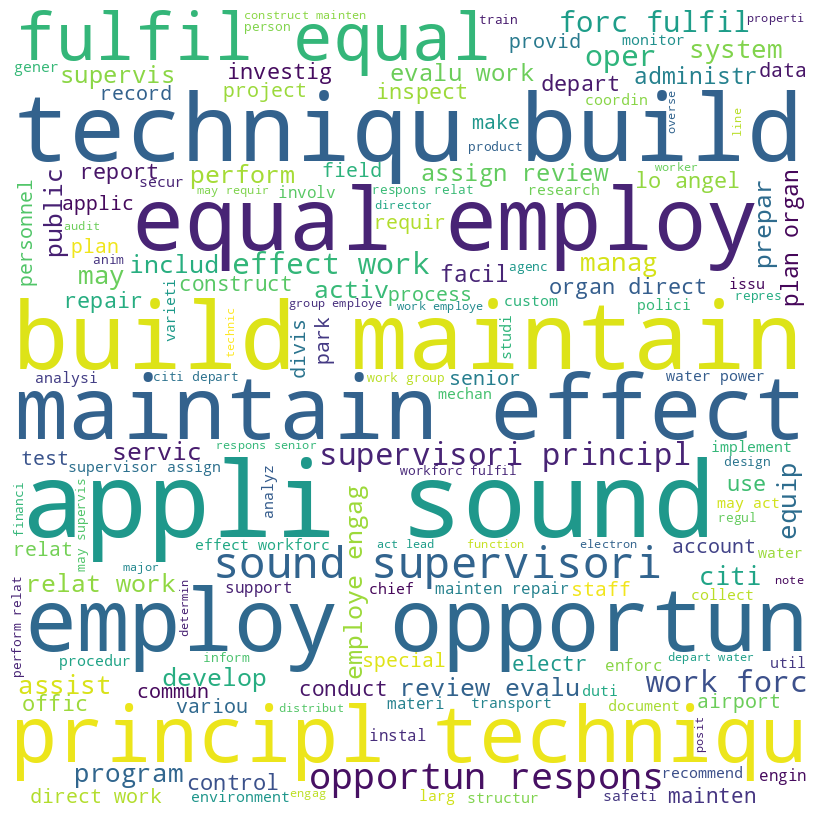

In [ ]:
duties_clean_words_string = " ".join(duties_stemmed)

wordcloud = WordCloud(
                width = 800,
                height = 800,
                background_color ='white',
                min_font_size = 10).generate(duties_clean_words_string)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Análise de viés de gênero
As palavras carregam consigo viéses inconcientes sobre nossa percepção de gênero.

Baseado em um estudo sobre o [viés de palavras](https://gender-decoder.katmatfield.com/static/documents/Gaucher-Friesen-Kay-JPSP-Gendered-Wording-in-Job-ads.pdf) nos texto, temos abaixo palavras que são geralmente carregadas de viés inconciente de gênero.

Mais em  https://gender-decoder.katmatfield.com/about

https://www.sciencedirect.com/science/article/abs/pii/S0925231222004374

https://medium.com/@yungcodes/detecting-gender-bias-in-job-market-for-energy-modelers-engineers-using-nltk-and-python-a1aa614bd45e

In [ ]:
masc_words = [
  'active',
  'adventurous',
  'aggress',
  'ambitio',
  'analy',
  'assert',
  'athlet',
  'autonom',
  'battle',
  'boast',
  'challeng',
  'champion',
  'compet',
  'confident',
  'courag',
  'decid',
  'decision',
  'decisive',
  'defend',
  'determin',
  'domina',
  'dominant',
  'driven',
  'fearless',
  'fight',
  'force',
  'greedy',
  'head-strong',
  'headstrong',
  'hierarch',
  'hostil',
  'impulsive',
  'independen',
  'individual',
  'intellect',
  'lead',
  'logic',
  'objective',
  'opinion',
  'outspoken',
  'persist',
  'principle',
  'reckless',
  'self-confiden',
  'self-relian',
  'self-sufficien',
  'selfconfiden',
  'selfrelian',
  'selfsufficien',
  'stubborn',
  'superior',
  'unreasonab'
]

In [ ]:
fem_words = [
  'agree',
  'affectionate',
  'child',
  'cheer',
  'collab',
  'commit',
  'communal',
  'compassion',
  'connect',
  'considerate',
  'cooperat',
  'co-operat',
  'depend',
  'emotiona',
  'empath',
  'feel',
  'flatterable',
  'gentle',
  'honest',
  'interpersonal',
  'interdependen',
  'interpersona',
  'inter-personal',
  'inter-dependen',
  'inter-persona',
  'kind',
  'kinship',
  'loyal',
  'modesty',
  'nag',
  'nurtur',
  'pleasant',
  'polite',
  'quiet',
  'respon',
  'sensitiv',
  'submissive',
  'support',
  'sympath',
  'tender',
  'together',
  'trust',
  'understand',
  'warm',
  'whin',
  'enthusias',
  'inclusive',
  'yield',
  'share',
  'sharin'
]

In [ ]:
def count_gender_biased_words(text):
  return {
      'masc': sum([text.count(word) for word in masc_words]),
      'fem': sum([text.count(word) for word in fem_words])
  }

In [ ]:
requirements_text = "" + every_job_text['requirements']

requirements_gender_count = count_gender_biased_words(requirements_text)

print("Masculine words count sum", requirements_gender_count['masc'])
print("Feminile words count sum", requirements_gender_count['fem'])

Masculine words count sum 187
Feminile words count sum 273


In [ ]:
duties_text = "" + every_job_text['duties']

duties_gender_count = count_gender_biased_words(duties_text)

print("Masculine words count sum", duties_gender_count['masc'])
print("Feminile words count sum", duties_gender_count['fem'])

Masculine words count sum 994
Feminile words count sum 791


In [ ]:
requirements_df = jobs_df['requirements']
gender_word_counts = []

for index in range(len(requirements_df)):
  text = requirements_df[index].lower()
  gender_word_counts.append(count_gender_biased_words(text))

jobs_df['requirements_masc_word_count'] = [genders['masc'] for genders in gender_word_counts]
jobs_df['requirements_fem_word_count'] = [genders['fem'] for genders in gender_word_counts]
jobs_df

,Unnamed: 0,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,selection,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,requirements_masc_word_count,requirements_fem_word_count
0,0,WATER SERVICE REPRESENTATIVE 1693 111717.txt,water service representative,"70,177","$87,194",2017-11-17,Three years of full-time paid experience in a ...,A Water Service Representative makes field inv...,"NOVEMBER 30, 2017",['Test'],Three,FULL_TIME,NaN,NaN,0,0
1,1,HARBOR PLANNING AND ECONOMIC ANALYST 9224 1118...,harbor planning and economic analyst,"70,908","$103,648",2016-11-18,1. Graduation from an accredited four-year col...,A Harbor Planning and Economic Analyst perform...,"DECEMBER 8, 2016",['Questionnaire'],Two,FULL_TIME,four,College or University,1,0
2,2,MANAGING WATER UTILITY ENGINEER 9406 032417 RE...,managing water utility engineer,"148,561","$184,579",2017-03-24,1. Two years of full-time paid experience at t...,A Managing Water Utility Engineer may serve as...,"APRIL 13, 2017","['Essay', 'Interview']",Two,FULL_TIME,NaN,NaN,0,0
3,3,VETERINARY TECHNICIAN 2369 020599 REV 120417.txt,veterinary technician,"50,425","$73,706",1999-02-05,A Registered Veterinary Technician (RVT) certi...,A Veterinary Technician assists a Veterinarian...,NaN,['Review'],NaN,NaN,NaN,NaN,0,0
4,4,SENIOR UTILITY SERVICES SPECIALIST 3573 113018...,senior utility services specialist,"117,199","$145,596",2018-11-30,Two years of full-time paid experience with th...,"A Senior Utility Services Specialist assigns, ...","DECEMBER 13, 2018","['Essay', 'Interview']",Two,FULL_TIME,NaN,NaN,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,655,PLUMBER SUPERVISOR 3446 100518.txt,plumber supervisor,"108,482",NaN,2018-10-05,1. Four years of full-time paid experience as ...,"A Plumber Supervisor assigns, reviews and eval...","OCTOBER 18, 2018",['Interview'],Four,FULL_TIME,NaN,NaN,0,0
656,656,PRINCIPAL ACCOUNTANT 1525 121517.txt,principal accountant,"77,840","$113,816",2017-12-15,Two years of full-time paid accounting or audi...,A Principal Accountant directs or assists in d...,"DECEMBER 28, 2017","['Essay', 'Interview']",Two,FULL_TIME,NaN,NaN,0,0
657,657,HELICOPTER MECHANIC 3742 072206 REV 020818.txt,helicopter mechanic,"96,074",NaN,2005-07-22,"Three years of full-time paid experience, two ...","A Helicopter Mechanic inspects, repairs, overh...",NaN,[],Three,FULL_TIME,NaN,NaN,0,0
658,658,PRINCIPAL ENVIRONMENTAL ENGINEER 7875 092118.txt,principal environmental engineer,"123,066","$179,943",2018-09-21,1. Registration as a Professional Engineer wit...,A Principal Environmental Engineer serves as t...,"OCTOBER 4, 2018","['Essay', 'Interview']",Two,FULL_TIME,NaN,NaN,0,0


In [ ]:
duties_df = jobs_df['duties']
gender_word_counts = []

for index in range(len(duties_df)):
  text = duties_df[index].lower()
  gender_word_counts.append(count_gender_biased_words(text))

jobs_df['duties_masc_word_count'] = [genders['masc'] for genders in gender_word_counts]
jobs_df['duties_fem_word_count'] = [genders['fem'] for genders in gender_word_counts]
jobs_df

,Unnamed: 0,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,selection,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,requirements_masc_word_count,requirements_fem_word_count,duties_masc_word_count,duties_fem_word_count
0,0,WATER SERVICE REPRESENTATIVE 1693 111717.txt,water service representative,"70,177","$87,194",2017-11-17,Three years of full-time paid experience in a ...,A Water Service Representative makes field inv...,"NOVEMBER 30, 2017",['Test'],Three,FULL_TIME,NaN,NaN,0,0,2,1
1,1,HARBOR PLANNING AND ECONOMIC ANALYST 9224 1118...,harbor planning and economic analyst,"70,908","$103,648",2016-11-18,1. Graduation from an accredited four-year col...,A Harbor Planning and Economic Analyst perform...,"DECEMBER 8, 2016",['Questionnaire'],Two,FULL_TIME,four,College or University,1,0,1,1
2,2,MANAGING WATER UTILITY ENGINEER 9406 032417 RE...,managing water utility engineer,"148,561","$184,579",2017-03-24,1. Two years of full-time paid experience at t...,A Managing Water Utility Engineer may serve as...,"APRIL 13, 2017","['Essay', 'Interview']",Two,FULL_TIME,NaN,NaN,0,0,2,8
3,3,VETERINARY TECHNICIAN 2369 020599 REV 120417.txt,veterinary technician,"50,425","$73,706",1999-02-05,A Registered Veterinary Technician (RVT) certi...,A Veterinary Technician assists a Veterinarian...,NaN,['Review'],NaN,NaN,NaN,NaN,0,0,0,0
4,4,SENIOR UTILITY SERVICES SPECIALIST 3573 113018...,senior utility services specialist,"117,199","$145,596",2018-11-30,Two years of full-time paid experience with th...,"A Senior Utility Services Specialist assigns, ...","DECEMBER 13, 2018","['Essay', 'Interview']",Two,FULL_TIME,NaN,NaN,4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,655,PLUMBER SUPERVISOR 3446 100518.txt,plumber supervisor,"108,482",NaN,2018-10-05,1. Four years of full-time paid experience as ...,"A Plumber Supervisor assigns, reviews and eval...","OCTOBER 18, 2018",['Interview'],Four,FULL_TIME,NaN,NaN,0,0,3,1
656,656,PRINCIPAL ACCOUNTANT 1525 121517.txt,principal accountant,"77,840","$113,816",2017-12-15,Two years of full-time paid accounting or audi...,A Principal Accountant directs or assists in d...,"DECEMBER 28, 2017","['Essay', 'Interview']",Two,FULL_TIME,NaN,NaN,0,0,2,1
657,657,HELICOPTER MECHANIC 3742 072206 REV 020818.txt,helicopter mechanic,"96,074",NaN,2005-07-22,"Three years of full-time paid experience, two ...","A Helicopter Mechanic inspects, repairs, overh...",NaN,[],Three,FULL_TIME,NaN,NaN,0,0,0,0
658,658,PRINCIPAL ENVIRONMENTAL ENGINEER 7875 092118.txt,principal environmental engineer,"123,066","$179,943",2018-09-21,1. Registration as a Professional Engineer wit...,A Principal Environmental Engineer serves as t...,"OCTOBER 4, 2018","['Essay', 'Interview']",Two,FULL_TIME,NaN,NaN,0,0,2,2


# Número de vagas com viés de gênero

Aqui temos a porcentagem de vagas com potenciais uso de palavras com viés de gênero.



<Axes: >

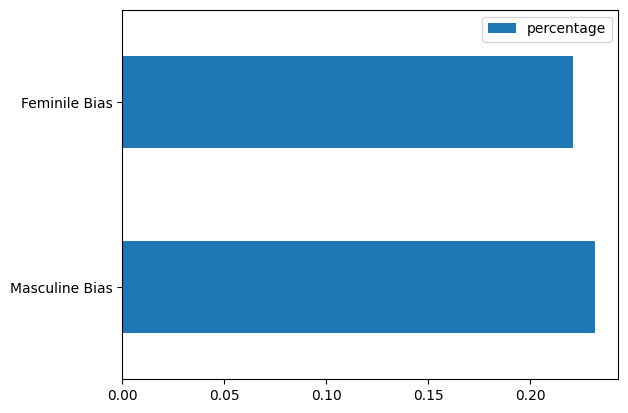

In [ ]:
requeriments_df = jobs_df.filter(items=['requirements_masc_word_count', 'requirements_fem_word_count'])

masc_num = 0
fem_num = 0

for index in range(len(requeriments_df)):
  item = requeriments_df.iloc[index]
  masc_count = item['requirements_masc_word_count']
  fem_count = item['requirements_fem_word_count']
  
  if masc_count > 0:
    masc_num += 1
  if fem_count > 0:
    fem_num += 1

masc_num_percentage = masc_num / len(requeriments_df)
fem_num_percentage = fem_num / len(requeriments_df)

df = pd.DataFrame(data={
                    'percentage': [masc_num_percentage, fem_num_percentage],
                  },
                  index=['Masculine Bias', 'Feminile Bias'])
df.plot(kind='barh')

In [ ]:
def count_number_of_occurence_for_gender(text):
  masc_occurences = []
  fem_occurences = []

  for masc_word in masc_words:
    number_of_occurences = requirements_text.count(masc_word)
    masc_occurences.append(number_of_occurences)

  for fem_word in fem_words:
    number_of_occurences = requirements_text.count(fem_word)
    fem_occurences.append(number_of_occurences)

  return {
      'masc': masc_occurences,
      'fem': fem_occurences
  }

In [ ]:
requirements_text = "" + every_job_text['requirements']
duties_text = "" + every_job_text['duties']
description_text = requirements_text + ' ' + duties_text

description_words_count = count_number_of_occurence_for_gender(description_text)

# Palavras com viés
Aqui temos gráficos exibindo as palavras com viéses mais comuns nas descrições das vagas de emprego da base.

<Axes: title={'center': 'Most Common Masculine Words'}, ylabel='masc_words'>

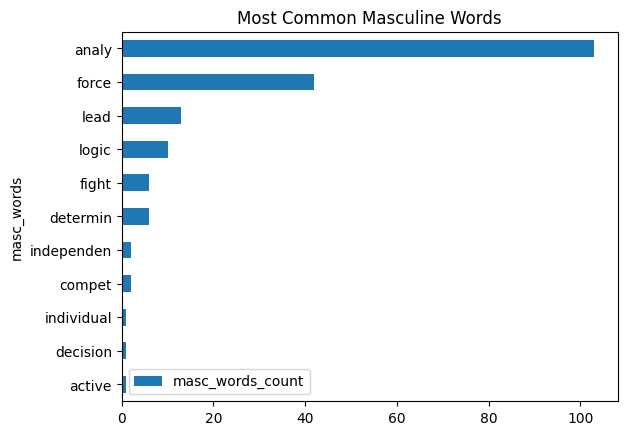

In [ ]:
description_data = {
    'masc_words': masc_words,
    'masc_words_count': description_words_count['masc'],
}
description_df = pd.DataFrame(data=description_data)
description_df = description_df[description_df['masc_words_count'] > 0]
description_df = description_df.sort_values('masc_words_count')
description_df.plot(title='Most Common Masculine Words', kind='barh', x='masc_words', y='masc_words_count')

<Axes: title={'center': 'Most Common Feminile Words'}, ylabel='fem_words'>

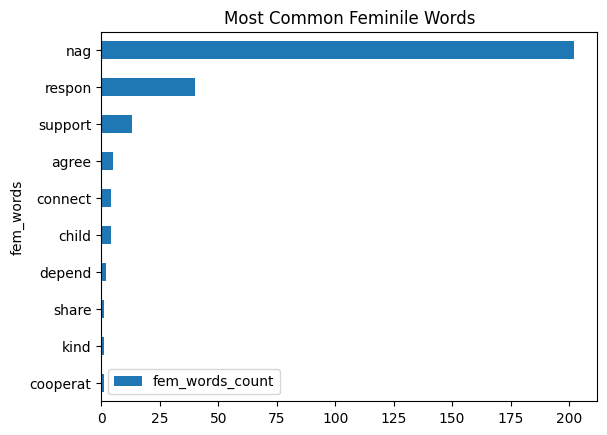

In [ ]:
description_data = {
    'fem_words': fem_words,
    'fem_words_count': description_words_count['fem'],
}
description_df = pd.DataFrame(data=description_data)
description_df = description_df[description_df['fem_words_count'] > 0]
description_df = description_df.sort_values('fem_words_count')
description_df.plot(title='Most Common Feminile Words', kind='barh', x='fem_words', y='fem_words_count')

# Título das vagas
Aqui, fazemos nuvens de palavras com as vagas que possuem mais viéses masculinos e femininos, mostrando quais vagas estão atreladas a cada um desses viéses.

In [ ]:
job_titles_bias = []

for index in range(len(jobs_df)):
  requirements_masc_words = jobs_df.iloc[index]['requirements_masc_word_count']
  duties_masc_words = jobs_df.iloc[index]['duties_masc_word_count']
  requirements_fem_words = jobs_df.iloc[index]['requirements_fem_word_count']
  duties_fem_words = jobs_df.iloc[index]['duties_fem_word_count']
  job_title_position = jobs_df.iloc[index]['Position']

  masc_sum = sum([requirements_masc_words, duties_masc_words])
  fem_sum = sum([requirements_fem_words, duties_fem_words])

  job_titles_bias.append({
      'job_title': job_title_position,
      'masc_word_count':  masc_sum,
      'fem_word_count':  fem_sum
  })

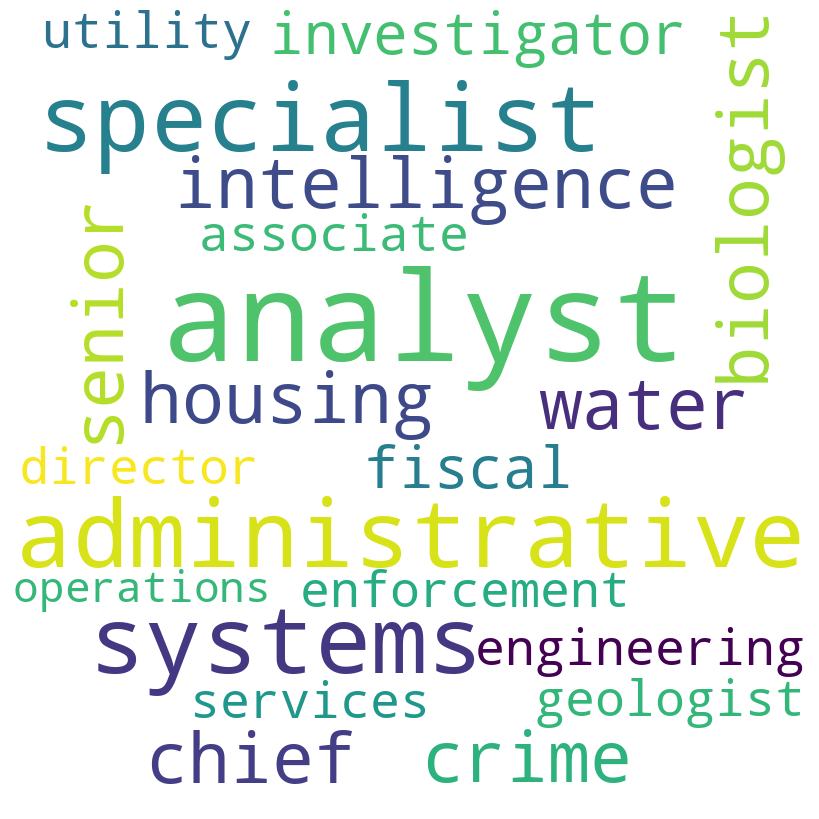

In [ ]:
job_titles_df = pd.DataFrame(data=job_titles_bias)
job_titles_df_sorted_by_masc = job_titles_df.sort_values(by='masc_word_count', ascending=False)

masc_job_titles_ten_top = " ".join(job_titles_df_sorted_by_masc[:10]['job_title'])

wordcloud = WordCloud(
                width = 800,
                height = 800,
                background_color ='white',
                min_font_size = 10).generate(masc_job_titles_ten_top)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

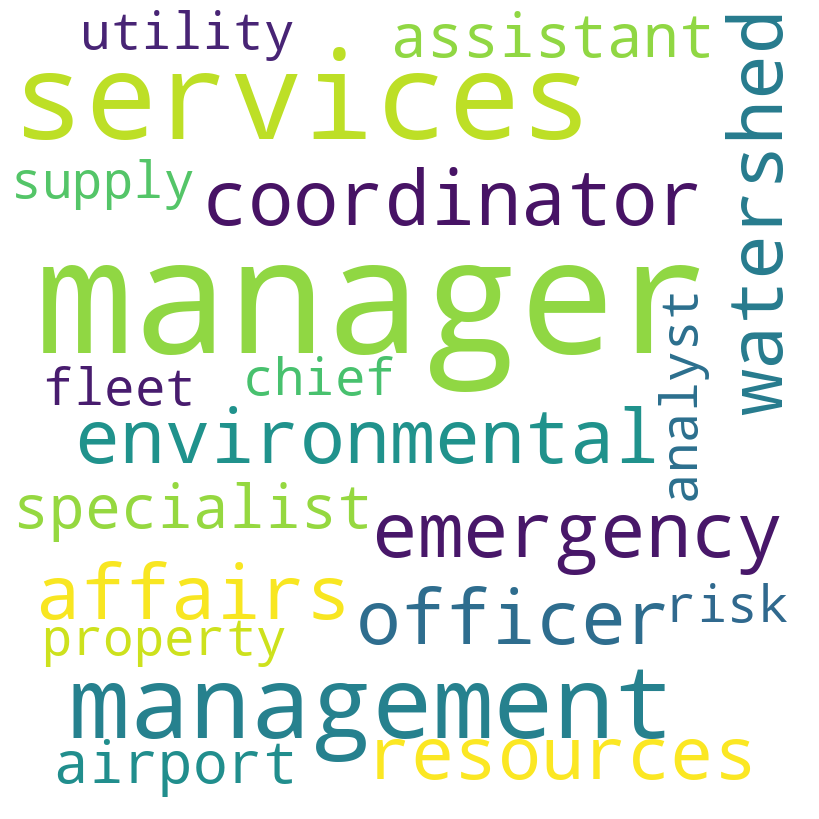

In [ ]:
job_titles_df = pd.DataFrame(data=job_titles_bias)
job_titles_df_sorted_by_fem = job_titles_df.sort_values(by='fem_word_count', ascending=False)

fem_job_titles_ten_top = " ".join(job_titles_df_sorted_by_fem[:10]['job_title'])

wordcloud = WordCloud(
                width = 800,
                height = 800,
                background_color ='white',
                min_font_size = 10).generate(fem_job_titles_ten_top)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
def convert_decimal_salary(x):
  x = str(x).replace(',','.').replace('$','')
  return float(x)

jobs_df.salary_start = jobs_df.salary_start.apply(convert_decimal_salary)
jobs_df.salary_end = jobs_df.salary_end.apply(convert_decimal_salary)

In [ ]:
jobs_with_masc_words_df = jobs_df[
    (jobs_df['duties_masc_word_count'] > jobs_df['duties_fem_word_count']) | (jobs_df['requirements_masc_word_count'] > jobs_df['requirements_fem_word_count'])
]

jobs_with_fem_words_df = jobs_df[
    (jobs_df['duties_fem_word_count'] > jobs_df['duties_masc_word_count']) | (jobs_df['requirements_fem_word_count'] > jobs_df['requirements_masc_word_count'])
]

In [ ]:
num_jobs_with_masc_bias = len(jobs_with_masc_words_df)
num_jobs_with_fem_bias = len(jobs_with_fem_words_df)

<Axes: >

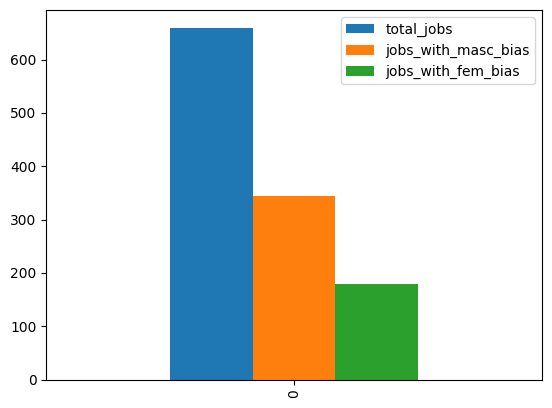

In [ ]:
df = pd.DataFrame({
    'total_jobs': [len(jobs_df)],
    'jobs_with_masc_bias': [num_jobs_with_masc_bias],
    'jobs_with_fem_bias': [num_jobs_with_fem_bias]
})
df.plot(kind='bar')

# Modelo de classificação de bias

In [ ]:
jobs_df.head(1)

,Unnamed: 0,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,selection,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,requirements_masc_word_count,requirements_fem_word_count,duties_masc_word_count,duties_fem_word_count
0,0,WATER SERVICE REPRESENTATIVE 1693 111717.txt,water service representative,70.177,87.194,2017-11-17,Three years of full-time paid experience in a ...,A Water Service Representative makes field inv...,"NOVEMBER 30, 2017",['Test'],Three,FULL_TIME,NaN,NaN,0,0,2,1


In [ ]:
jobs_df['has_masc_bias'] = (jobs_df['requirements_masc_word_count'] > 0) | (jobs_df['duties_masc_word_count'] > 0)
jobs_df['has_fem_bias'] = (jobs_df['requirements_fem_word_count'] > 0) | (jobs_df['duties_fem_word_count'] > 0)

def to_int(value):
  if value == True:
    return 1
  else:
    return 0
jobs_df['has_masc_bias'] = jobs_df['has_masc_bias'].astype(int)
jobs_df['has_masc_bias'] = jobs_df['has_fem_bias'].astype(int)
jobs_df.head(1)

,Unnamed: 0,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,selection,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,requirements_masc_word_count,requirements_fem_word_count,duties_masc_word_count,duties_fem_word_count,has_masc_bias,has_fem_bias
0,0,WATER SERVICE REPRESENTATIVE 1693 111717.txt,water service representative,70.177,87.194,2017-11-17,Three years of full-time paid experience in a ...,A Water Service Representative makes field inv...,"NOVEMBER 30, 2017",['Test'],Three,FULL_TIME,NaN,NaN,0,0,2,1,1,True


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:


def clean_text(text):
  all_text = text
  tokens =  tokenizer.tokenize(all_text)
  tokens_without_stopwords = [word.lower() for word in tokens if word.lower() not in stopword_list]
  
  return tokens_without_stopwords


jobs_df['all_text'] = jobs_df['requirements'] + ' ' + jobs_df['duties']
jobs_df['all_tokens'] = jobs_df['all_text'].apply(clean_text)
jobs_df.head(1)

,Unnamed: 0,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,selection,...,EDUCATION_YEARS,SCHOOL_TYPE,requirements_masc_word_count,requirements_fem_word_count,duties_masc_word_count,duties_fem_word_count,has_masc_bias,has_fem_bias,all_text,all_tokens
0,0,WATER SERVICE REPRESENTATIVE 1693 111717.txt,water service representative,70.177,87.194,2017-11-17,Three years of full-time paid experience in a ...,A Water Service Representative makes field inv...,"NOVEMBER 30, 2017",['Test'],...,NaN,NaN,0,0,2,1,1,True,Three years of full-time paid experience in a ...,"[three, years, full, time, paid, experience, c..."


In [ ]:
train_size = int(jobs_df.shape[0] * 0.75)
train_df = jobs_df[:train_size]
test_df = jobs_df[train_size:]

train_sentences_df = train_df.all_tokens.to_numpy()
train_targets_df = train_df.has_masc_bias.to_numpy()

test_sentences_df = test_df.all_tokens.to_numpy()
test_targets_df = test_df.has_masc_bias.to_numpy()

In [ ]:
unique_words = []
for words in jobs_df['all_tokens']:
  for word in words:
    unique_words.append(word)

unique_words = set(unique_words)
words_size = len(unique_words)

In [ ]:
tf_tokenizer = tf.keras.layers.TextVectorization(
  output_mode='int',
  output_sequence_length=words_size,
  vocabulary=list(unique_words)
)

embedding_dim=16

model = tf.keras.Sequential([
  tf_tokenizer,
  tf.keras.layers.Embedding(words_size, embedding_dim, name="embedding"),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

In [ ]:
model.fit(
  train_sentences_df,
  validation_data=train_targets_df,
  epochs=15,
  callbacks=[tensorboard_callback]
)

ValueError: ignored

In [ ]:
model.summary()
